<a href="https://colab.research.google.com/github/cdrowley/wine-quality/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data In

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


## EDA

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
def unique_column_values(df):
    return df.agg('nunique').to_frame().rename(columns={0: 'unique_values'}).sort_values('unique_values')
    
unique_column_values(df)

,unique_values
quality,6
free sulfur dioxide,60
alcohol,65
citric acid,80
pH,89
residual sugar,91
fixed acidity,96
sulphates,96
volatile acidity,143
total sulfur dioxide,144


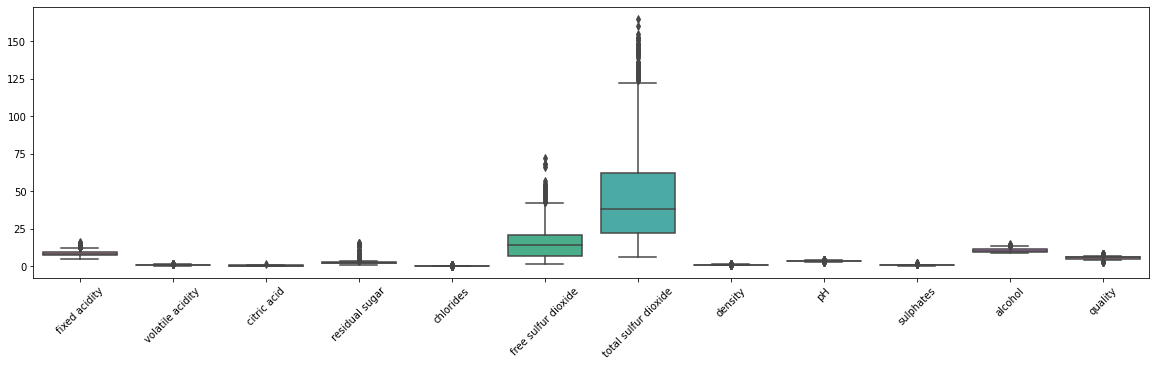

In [44]:
fig, x = plt.subplots(1, figsize=(20, 5))

ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [42]:
# Remove extreme outliers
df = df.loc[df['total sulfur dioxide'] < 200]

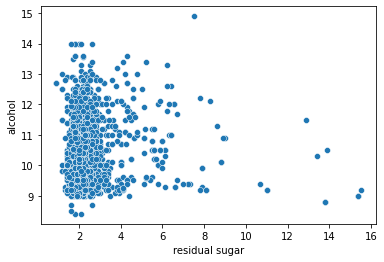

In [45]:
sns.scatterplot(x=df['residual sugar'], y=df['alcohol'])
plt.show()

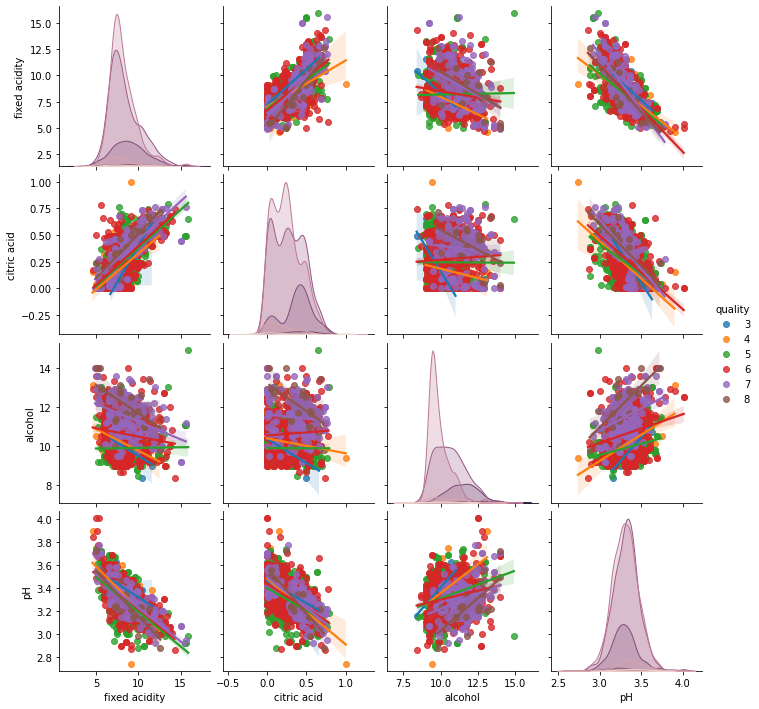

In [46]:
plot_cols = ['fixed acidity', 'citric acid', 'alcohol', 'pH', 'quality']
sns.pairplot(df[plot_cols], kind='reg', hue='quality')
plt.show()

## T-test for acidity on wine quality

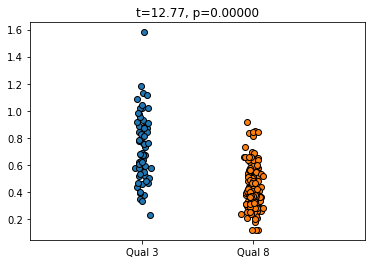

In [47]:
# extract samples (to test if means are significantly different)
x = df['volatile acidity'][df['quality'].isin([3, 4])]
y = df['volatile acidity'][df['quality'].isin([7, 8])]

plt.plot(np.random.randn(len(x))/30, x, 'o',
         np.random.randn(len(y))/30+1, y, 'o',
         markeredgecolor='k')

# ttest
ttest = stats.ttest_ind(x, y)

# plot
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Qual 3', 'Qual 8'])
plt.title(f't={ttest[0]:.2f}, p={ttest[1]:.5f}')
plt.show()

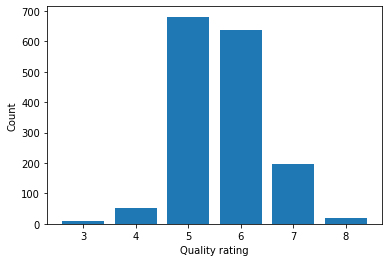

In [48]:
counts = df['quality'].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# df['quality'].hist();

## Multiple Regression

In [51]:
import statsmodels.api as sm

dep_var = df['quality']
ind_vars = df.drop(labels='quality', axis=1)

ind_vars = sm.add_constant(ind_vars)
model = sm.OLS(endog=dep_var, exog=ind_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          1.30e-145
Time:                        16:04:19   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

In [52]:
sig_cols = list(model.pvalues[model.pvalues < .05].keys())
print("\n".join(sig_cols))

# add dep variable to facet plot by
sig_cols.append('quality')

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


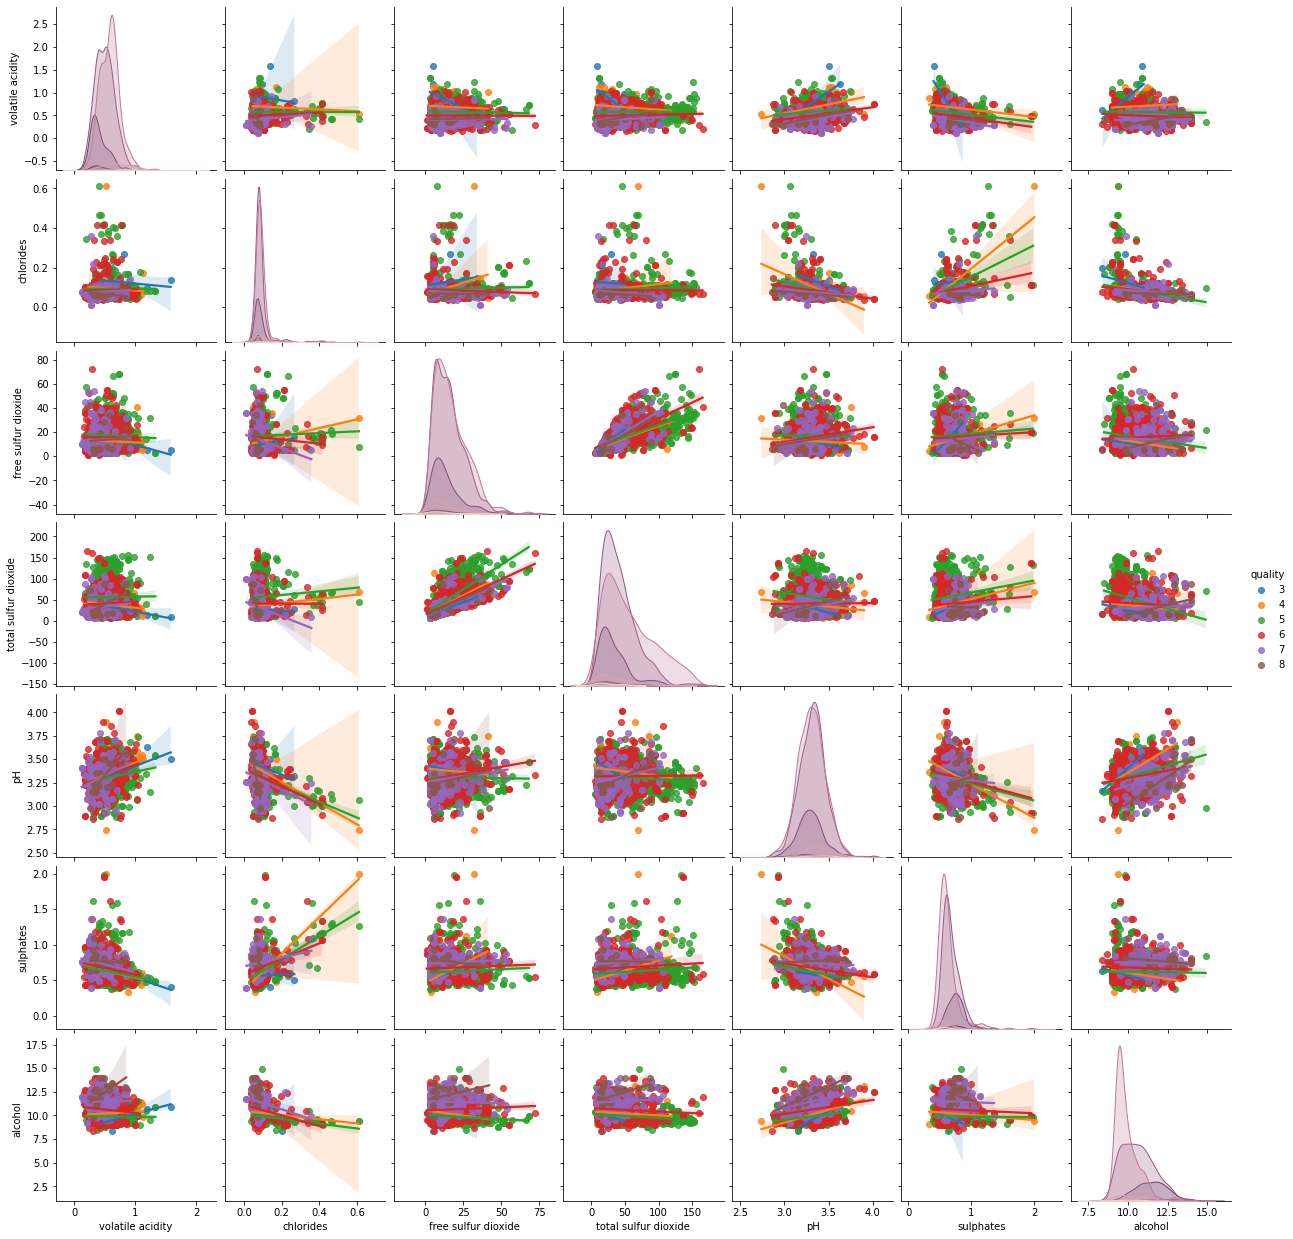

In [53]:
sns.pairplot(df[sig_cols], kind='reg', hue='quality')

## Logistic Regression

In [54]:
df['binquality'] = df['quality'] > df['quality'].mean()

In [55]:
Xcols = [key for key in df.keys() if key not in ['quality', 'binquality']]

In [56]:
model = sm.Logit(df['binquality'], df[Xcols])
results = model.fit(method='newton')
results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:                  0.2525
Time:                        16:05:11   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [57]:
sig_cols_logit = list(results.pvalues[results.pvalues < .05].keys())
print("Significant predictors from the logistic regression:", "\n".join(sig_cols_logit), sep='\n')
print('-----------------------------------------------------')
print("Significant predictors from the standard regression:", "\n".join(sig_cols[:-1]), sep='\n')

Significant predictors from the logistic regression:
volatile acidity
citric acid
chlorides
free sulfur dioxide
total sulfur dioxide
density
sulphates
alcohol
-----------------------------------------------------
Significant predictors from the standard regression:
volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


## Transform to Gaussian Distribution

Four step process:


1.   Create brownian noise
2.   Rank transform
3.   Scale to (-1 +1)
4.   Apply inverse hyperbolic tangent


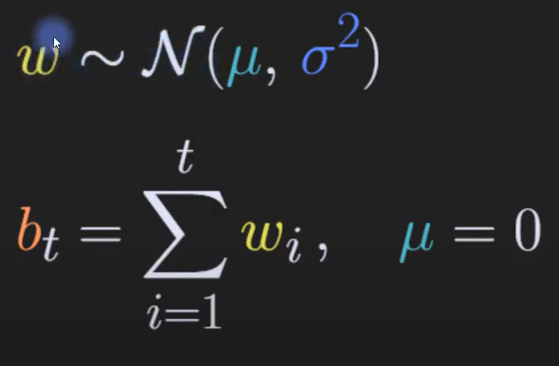


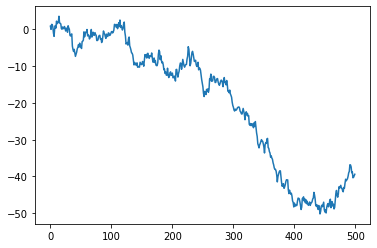

In [58]:
# Brownian Noise
n = 500
x = np.cumsum(np.random.randn(n))
plt.plot(x);

In [59]:
print(np.min(x), np.max(x))

# rank x & then normalise (0 - 1)
y = (stats.rankdata(x) / (n+1))*2 - 1
print(np.min(y), np.max(y))

# could do it this way too
y = (stats.rankdata(x) / (n+1) - .5)*2
print(np.min(y), np.max(y))

# final part of the algorithm to convert non-normal to normal distribution
y = np.arctanh(y)

-50.164699886720555 3.5236696529797893
-0.9960079840319361 0.996007984031936
-0.9960079840319361 0.996007984031936


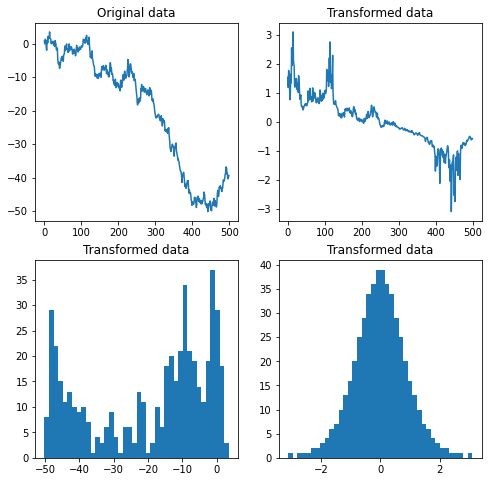

In [60]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].plot(x)
ax[0,0].set_title('Original data')

ax[0,1].plot(y)
ax[0,1].set_title('Transformed data')

ax[1,0].hist(x, bins=40)
ax[1,0].set_title('Transformed data')

ax[1,1].hist(y, bins=40)
ax[1,1].set_title('Transformed data')

plt.show()

Text(0, 0.5, 'Transformed')

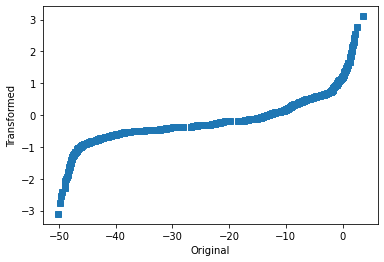

In [61]:
plt.plot(x, y, 's')
plt.xlabel('Original')
plt.ylabel('Transformed')

# This shows a non-linear monotonic relationship